# 대중교통 데이터 분석

In [1]:
import usecsv

data = usecsv.switch(usecsv.opencsv("csv/subwayfee.csv"))

for row in data:
    print(row)

['사용월', '호선명', '역ID', '지하철역', '유임승차', '유임하차', '무임승차', '무임하차']
['2019-01', '1호선', 150.0, '서울역', 1516452.0, 1400464.0, 221180.0, 211764.0]
['2019-01', '1호선', 151.0, '시청', 676932.0, 676266.0, 102388.0, 101033.0]
['2019-01', '1호선', 152.0, '종각', 1240810.0, 1177643.0, 162410.0, 152062.0]
['2019-01', '1호선', 153.0, '종로3가', 703110.0, 674148.0, 387062.0, 362735.0]
['2019-01', '1호선', 154.0, '종로5가', 571824.0, 583955.0, 275447.0, 263687.0]
['2019-01', '1호선', 155.0, '동대문', 308301.0, 342898.0, 134071.0, 138633.0]
['2019-01', '1호선', 156.0, '신설동', 360561.0, 353834.0, 126466.0, 120147.0]
['2019-01', '1호선', 157.0, '제기동', 293540.0, 288217.0, 374571.0, 400607.0]
['2019-01', '1호선', 158.0, '청량리(서울시립대입구)', 463456.0, 482960.0, 352121.0, 357571.0]
['2019-01', '1호선', 159.0, '동묘앞', 174683.0, 188711.0, 146034.0, 147551.0]
['2019-01', '2호선', 201.0, '시청', 706097.0, 679503.0, 61058.0, 55387.0]
['2019-01', '2호선', 202.0, '을지로입구', 1415414.0, 1414980.0, 120425.0, 111592.0]
['2019-01', '2호선', 203.0, '을지로3가', 608979.0, 601

In [7]:
mx = 0
rate = 0
mx_station = ''
for row in data[1:]:
    if row[6] == 0:
        print(row[1],row[3])
    if row[6] != 0:
        rate = row[4] / row[6] #유임승차비율 = 유임승차인원/무임승차인원
    if mx < rate:
        mx = rate
        mx_station = row[3]+' '+row[1]+' '+str(row[4])
print(mx,mx_station)



경원선 창동
분당선 복정
일산선 지축
경의선 서울역
경의선 홍대입구
경의선 김포공항
경의선 계양
경의선 검암
27.5 충무로 3호선 55.0


In [12]:
mx = 0
rate = 0
mx_station = ''
for row in data[1:]:
    if row[6] == 0:
        print(row[1],row[3])
    if row[6] != 0 and (row[4]+row[6]) > 100000:
        rate = row[4] / (row[4]+row[6]) #유임승차비율 = 유임승차인원/전체승차인원
    if mx < rate:
        mx = rate
        mx_station = row[3]+' '+row[1]+' '+str(row[4])+' '+str(row[6])
        print(mx_station,round(mx*100,2))



서울역 1호선 1516452.0 221180.0 87.27
종각 1호선 1240810.0 162410.0 88.43
시청 2호선 706097.0 61058.0 92.04
을지로입구 2호선 1415414.0 120425.0 92.16
한양대 2호선 233785.0 15380.0 93.83
강남 2호선 3153418.0 186486.0 94.42
홍대입구 2호선 2351935.0 114832.0 95.34
경원선 창동
분당선 복정
일산선 지축
경의선 서울역
경의선 홍대입구
경의선 김포공항
경의선 계양
경의선 검암


In [2]:
mx = [0]*4
mx_station = ['']*4
label = ['유임승차','유임하차','무임승차','무임하차']

for row in data[1:]:
    for i in range(4,8):
        if mx[i-4] < row[i]:
            mx[i-4] = row[i]
        # if mx[0] < row[4]:
        #     mx[0] = row[4]
        # if mx[1] < row[5]:
        #     mx[1] = row[5] 
        # if mx[2] < row[6]:
        #     mx[2] = row[6]
        # if mx[3] < row[7]:
        #     mx[3] = row[7]     
            mx_station[i-4] = row[3]+' '+row[1]
for i in range(4):
    print(label[i]+" : "+ mx_station[i],mx[i])

유임승차 : 강남 2호선 3153418.0
유임하차 : 강남 2호선 3210437.0
무임승차 : 종로3가 1호선 387062.0
무임하차 : 제기동 1호선 400607.0


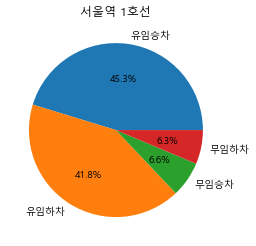

In [21]:
# import matplotlib.pyplot as plt
plt.rc('font', family = 'Malgun Gothic')
# plt.rcParams['axes.unicode_minus'] = False
label = ['유임승차','유임하차','무임승차','무임하차']
plt.title(data[1][3]+' '+data[1][1])
plt.pie(data[1][4:8],labels = label, autopct='%.1f%%')
plt.show()

In [25]:
# label = ['유임승차','유임하차','무임승차','무임하차']
# # plt.rc('font', family = 'Malgun Gothic')
# for row in data[1:]:
#     plt.title(row[3]+' '+row[1])
#     plt.pie(row[4:8],labels = label, autopct='%.1f%%')
# plt.show()